In [1]:
sys.path.append('../shared_code')
import os
import SVM_model as svm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import Data_analysis as da
import matplotlib.ticker as ticker
import importlib, Von_Heijne_model as vh
importlib.reload(vh)

<module 'Von_Heijne_model' from '/home/teresagianni/LAB2_project_group_N11/6_FP_FN_evaluation/../shared_code/Von_Heijne_model.py'>

# **False Positive and False Negative analysis** 

In [2]:
training = pd.read_csv("../2_data_preparation/sets/train_with_seq.tsv", sep='\t')
benchmark = pd.read_csv("../2_data_preparation/sets/test_with_seq.tsv", sep='\t')

## **Von Heijne**

In [3]:
y_pred_vh = vh.y_predictions_vh
benchmark['predictions_vh'] = y_pred_vh
benchmark.head()

,id,organism_name,kingdom,sequence_length,cleavage_site,sp_type,transmembrane,sequence,predictions_vh
0,A0A1S6EK92,Moringa oleifera,Viridiplantae,79,20.0,1,NaN,MAKLSFLSLFLLCLVATATAQNCGRQAGNRACANGLCCSQYGFCGS...,1
1,P19801,Homo sapiens,Metazoa,751,19.0,1,NaN,MPALGWAVAAILMLQTAMAEPSPGTLPRKAGVFSDLSNQELKAVHS...,0
2,P79263,Sus scrofa,Metazoa,921,27.0,1,NaN,MKTLSPTGYGLLLVLPLLLAVLQSTTAHKNDINIYSLTVDSKVSSR...,1
3,P21814,Ovis aries,Metazoa,429,25.0,1,NaN,MSHRRMQLALSLVFILCGLFNSIFCEKQQHSQQHANLVLLKKISAF...,0
4,P29421,Oryza sativa subsp. japonica,Viridiplantae,200,22.0,1,NaN,MVSLRLPLILLSLLAISFSCSAAPPPVYDTEGHELSADGSYYVLPA...,1


In [4]:
fp_vh = benchmark.loc[(benchmark['sp_type'] == 0) & (benchmark['predictions_vh'] == 1)].copy()
fn_vh = benchmark.loc[(benchmark['sp_type'] == 1) & (benchmark['predictions_vh'] == 0)].copy()

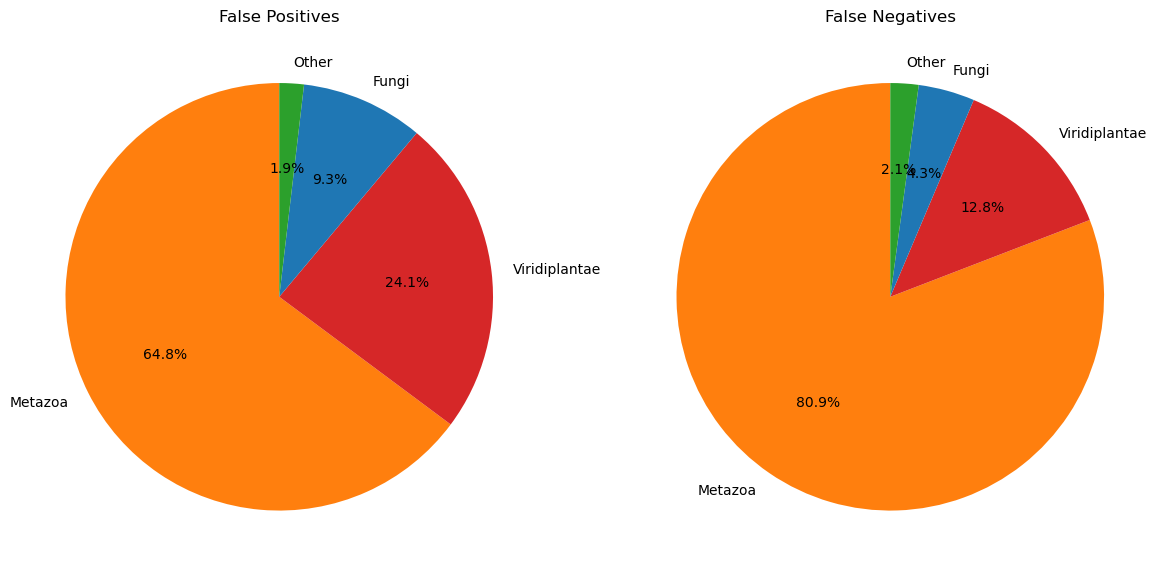

In [5]:
def pie_chart_plot (name, dataset_p, dataset_n, dataset_t):
    kingdom_count_fp = dataset_p['kingdom'].value_counts()
    kingdom_count_fn = dataset_n['kingdom'].value_counts()
    kingdoms = sorted(dataset_t['kingdom'].unique())
    palette = sns.color_palette("tab10", n_colors=len(kingdoms))
    color_map = dict(zip(kingdoms, palette))
    colors_fp = [color_map[k] for k in kingdom_count_fp.index]
    colors_fn = [color_map[k] for k in kingdom_count_fn.index]
    
    fig, axes = plt.subplots(1, 2, figsize=(12,6))
    
    axes[0].pie(
        kingdom_count_fp,
        labels=kingdom_count_fp.index,
        colors=colors_fp,
        autopct='%1.1f%%',
        startangle=90
    )
    axes[0].set_title("False Positives")
    
    axes[1].pie(
        kingdom_count_fn,
        labels=kingdom_count_fn.index,
        colors=colors_fn,
        autopct='%1.1f%%',
        startangle=90
    )
    axes[1].set_title("False Negatives")
    
    plt.tight_layout()
    plt.savefig(name, dpi=500, format='png')
    plt.show()

pie_chart_plot('../6_FP_FN_evaluation/figures/FP_FN_pie_charts_vh.png', fp_vh, fn_vh, benchmark)

In [6]:
tm_vh = fp_vh.loc[fp_vh['transmembrane']==True]
print(len(tm_vh))

35


In [7]:
TM = benchmark.loc[benchmark['transmembrane'] == True]
print(len(TM))

136


In [8]:
# False positive rate on transmembrane
FP_TM = round((len(tm_vh)/len(TM)), 4)
print(FP_TM)

0.2574


In [9]:
# False positive rate overall dataset
FPR_vh = round((len(fp_vh)/len(benchmark)), 4)
print(FPR_vh)

0.0538


In [10]:
fn_vh.head()

,id,organism_name,kingdom,sequence_length,cleavage_site,sp_type,transmembrane,sequence,predictions_vh
1,P19801,Homo sapiens,Metazoa,751,19.0,1,NaN,MPALGWAVAAILMLQTAMAEPSPGTLPRKAGVFSDLSNQELKAVHS...,0
3,P21814,Ovis aries,Metazoa,429,25.0,1,NaN,MSHRRMQLALSLVFILCGLFNSIFCEKQQHSQQHANLVLLKKISAF...,0
9,P19320,Homo sapiens,Metazoa,739,24.0,1,NaN,MPGKMVVILGASNILWIMFAASQAFKIETTPESRYLAQIGDSVSLT...,0
10,P58912,Phyllodiscus semoni,Metazoa,488,21.0,1,NaN,MSKPIIFLLTAFVVLTDLGATEDTEKVEVKAKPSKTSRGAIGQGFE...,0
16,Q9NQ25,Homo sapiens,Metazoa,335,22.0,1,NaN,MAGSPTCLTLIYILWQLTGSAASGPVKELVGSVGGAVTFPLKSKVK...,0


In [11]:
fn_vh['logo_sequence'] = fn_vh.apply(da.cut_sp_sequence_logo, axis = 1)
da.to_fasta(fn_vh, "fn_vh", "../6_FP_FN_evaluation/logos/")

<_io.TextIOWrapper name='../6_FP_FN_evaluation/logos/Logo_sequence_fn_vh.fasta' mode='w' encoding='UTF-8'>

## **SVM**

In [12]:
y_predictions = svm.npz_to_dataframe("../5_SVM/npz_files/y_predictions.npz")
y_predictions[0]

,arr_0
0,1
1,1
2,1
3,1
4,1
...,...
2001,0
2002,0
2003,0
2004,0


In [13]:
benchmark['predictions_svm'] = y_predictions[0]
benchmark.head()

,id,organism_name,kingdom,sequence_length,cleavage_site,sp_type,transmembrane,sequence,predictions_vh,predictions_svm
0,A0A1S6EK92,Moringa oleifera,Viridiplantae,79,20.0,1,NaN,MAKLSFLSLFLLCLVATATAQNCGRQAGNRACANGLCCSQYGFCGS...,1,1
1,P19801,Homo sapiens,Metazoa,751,19.0,1,NaN,MPALGWAVAAILMLQTAMAEPSPGTLPRKAGVFSDLSNQELKAVHS...,0,1
2,P79263,Sus scrofa,Metazoa,921,27.0,1,NaN,MKTLSPTGYGLLLVLPLLLAVLQSTTAHKNDINIYSLTVDSKVSSR...,1,1
3,P21814,Ovis aries,Metazoa,429,25.0,1,NaN,MSHRRMQLALSLVFILCGLFNSIFCEKQQHSQQHANLVLLKKISAF...,0,1
4,P29421,Oryza sativa subsp. japonica,Viridiplantae,200,22.0,1,NaN,MVSLRLPLILLSLLAISFSCSAAPPPVYDTEGHELSADGSYYVLPA...,1,1


In [14]:
fp_svm = benchmark.loc[(benchmark['sp_type'] == 0) & (benchmark['predictions_svm'] == 1)].copy()
fn_svm = benchmark.loc[(benchmark['sp_type'] == 1) & (benchmark['predictions_svm'] == 0)].copy()

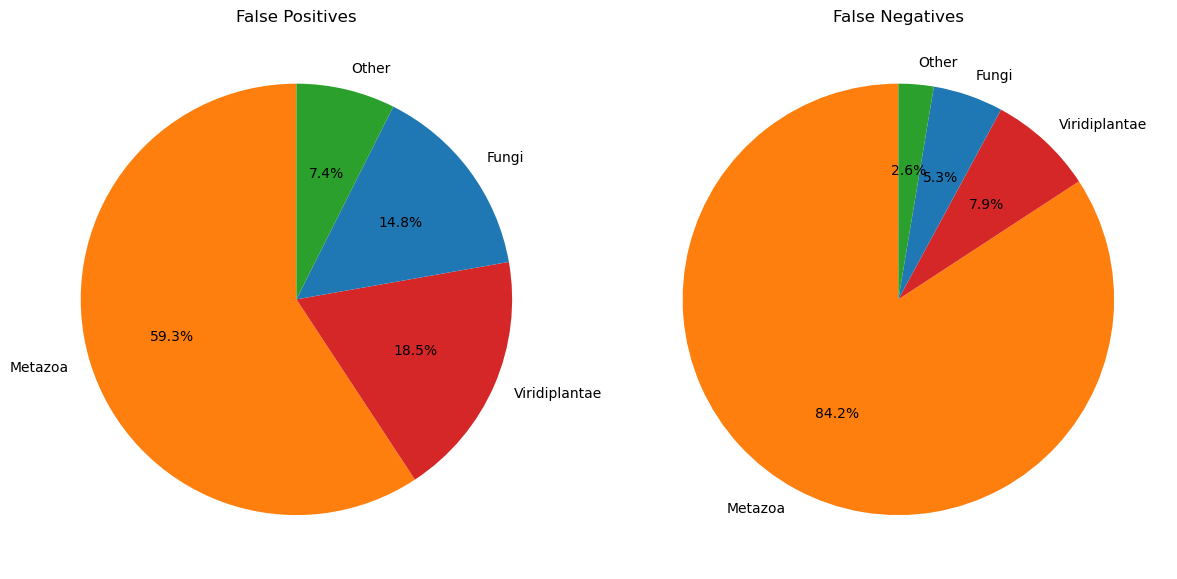

In [15]:
pie_chart_plot('../6_FP_FN_evaluation/figures/FP_FN_pie_charts_svm.png', fp_svm, fn_svm, benchmark)

In [16]:
transmembrane = fp_svm.loc[fp_svm['transmembrane']==True]
print(len(transmembrane))
transmembrane

14


,id,organism_name,kingdom,sequence_length,cleavage_site,sp_type,transmembrane,sequence,predictions_vh,predictions_svm
295,Q8NCG7,Homo sapiens,Metazoa,672,NaN,0,True,MPGMVLFGRRWAIASDDLVFPGFFELVVRVLWWIGILTLYLMHRGK...,1,1
350,P56749,Homo sapiens,Metazoa,244,NaN,0,True,MGCRDVHAATVLSFLCGIASVAGLFAGTLLPNWRKLRLITFNRNEK...,1,1
414,O75324,Homo sapiens,Metazoa,88,NaN,0,True,MSIMDHSPTTGVVTVIVILIAIAALGALILGCWCYLRLQRISQSED...,1,1
815,Q8VHW8,Rattus norvegicus,Metazoa,275,NaN,0,True,MSTCGRKALTLLSSVFAVCGLGLLGIAVSTDYWLYLEEGIILPQNQ...,1,1
968,Q8N695,Homo sapiens,Metazoa,610,NaN,0,True,MDTPRGIGTFVVWDYVVFAGMLVISAAIGIYYAFAGGGQQTSKDFL...,0,1
1017,Q04083,Saccharomyces cerevisiae (strain ATCC 204508 /...,Fungi,370,NaN,0,True,MNRVGIDVDHMIGVLLLAVVVVFWVGASCLTNELLETNAYNKPFFL...,1,1
1065,Q9D563,Mus musculus,Metazoa,222,NaN,0,True,MRVRLGALAGAAALSGALSFVLLAAAIGTDFWYIIDTERLERSSQR...,1,1
1137,P28648,Rattus norvegicus,Metazoa,238,NaN,0,True,MAVEGGMKCVKFLLYVLLLAFCACAVGLIAIGVAVQVVLKQAITHE...,1,1
1297,Q8N292,Homo sapiens,Metazoa,157,NaN,0,True,MSKSCGNNLAAISVGISLLLLLVVCGIGCVWHWKHRVATRFTLPRF...,1,1
1302,Q2Q5T5,Mus musculus,Metazoa,84,NaN,0,True,MPVPLLPMVLRSLLSRLLLPVARLARQHLLPLLRRLARRLSSQDMR...,1,1


In [17]:
# False positive rate on transmembrane
FP_TM = round((len(transmembrane)/len(TM)), 4)
print(FP_TM)

0.1029


In [18]:
# False positive rate overall dataset
all_FP = round((len(fp_svm)/len(benchmark)), 4)
print(all_FP)

0.0135


## **AA composition among positives from the training set and true positives and false negatives from test set**

In [74]:
train_features = svm.npz_to_dataframe("../5_SVM/npz_files/separate_features.npz")[0]
test_features = svm.npz_to_dataframe("../5_SVM/npz_files/test_features.npz")[0]
train_features['id'] = training['id']
test_features['id'] = benchmark['id']

In [75]:
pos_train = training.loc[training['sp_type'] == 1].copy()
print(len(pos_train))

874


In [76]:
pos_benchmark_svm = benchmark.loc[(benchmark['sp_type'] == 1) & (benchmark['predictions_svm'] == 1)].copy()
print(len(pos_benchmark_svm))

181


In [77]:
print(len(fn_svm))

38


In [78]:
pos_train['aa_comp'] = pos_train['sequence'].apply(svm.aa_composition, args=(25, vh.index_aa))


In [79]:
pos_benchmark_svm['aa_comp'] = pos_benchmark_svm['sequence'].apply(svm.aa_composition, args=(25, vh.index_aa))

In [80]:
fn_svm['aa_comp'] = fn_svm['sequence'].apply(svm.aa_composition, args=(25, vh.index_aa))

In [81]:
pos_train['aa_comp'] = pos_train['aa_comp'].apply(lambda v: np.asarray(v, dtype=float).ravel())
pos_benchmark_svm['aa_comp']  = pos_benchmark_svm['aa_comp'].apply(lambda v: np.asarray(v, dtype=float).ravel())
fn_svm['aa_comp']  = fn_svm['aa_comp'].apply(lambda v: np.asarray(v, dtype=float).ravel())

mean_comp_pos           = np.vstack(pos_train['aa_comp'].values).mean(axis=0)
mean_comp_pos_benchmark = np.vstack(pos_benchmark_svm['aa_comp'].values).mean(axis=0)
mean_comp_FN            = np.vstack(fn_svm['aa_comp'].values).mean(axis=0)

assert mean_comp_pos.shape == mean_comp_pos_benchmark.shape == mean_comp_FN.shape == (20,)


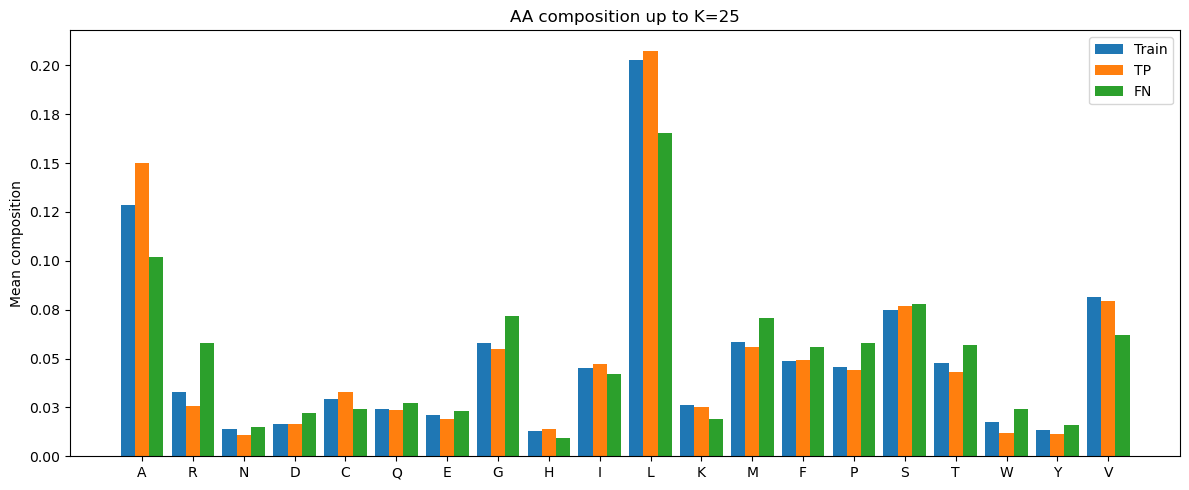

In [82]:
labels = list(vh.index_aa)          # deve avere 20 simboli
assert len(labels) == 20
x = np.arange(20); barw = 0.28

fig, ax = plt.subplots(figsize=(12,5))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
ax.bar(x - barw, mean_comp_pos,           width=barw, label='Train',      linewidth=1.0)
ax.bar(x,        mean_comp_pos_benchmark, width=barw, label='TP', linewidth=1.0)
ax.bar(x + barw, mean_comp_FN,            width=barw, label='FN', linewidth=1.0)
ax.set_xticks(x); ax.set_xticklabels(labels)
ax.set_ylabel('Mean composition')
ax.set_title(f'AA composition up to K={25}')
ax.legend(); fig.tight_layout(); plt.show()


In [83]:
pos_train['dataset'] = 'Train'
pos_benchmark_svm['dataset'] = 'TP'
fn_svm['dataset'] = 'FN'
sequence_lengths = pd.concat([pos_train, pos_benchmark_svm, fn_svm], ignore_index=True)

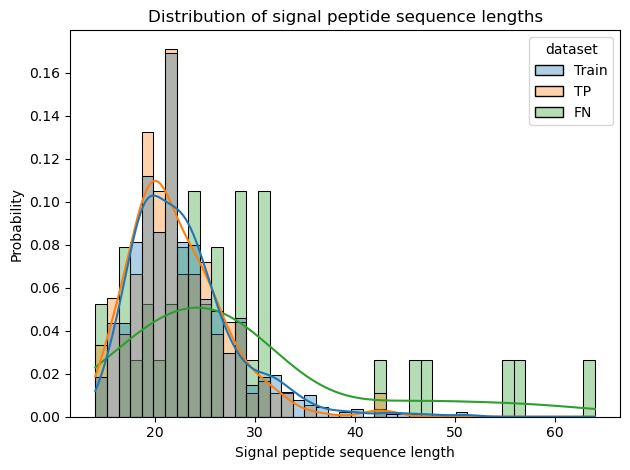

In [84]:
palette = {
    'Train': '#1f77b4',  
    'TP': '#ff7f0e',    
    'FN': '#2ca02c'     
}
sns.histplot(
    data=sequence_lengths,
    x='cleavage_site',
    hue='dataset',
    hue_order=['Train', 'TP', 'FN'],
    palette=palette,
    kde=True,
    stat='probability',
    common_norm=False,
    alpha=0.35
)
plt.xlabel("Signal peptide sequence length")
plt.ylabel("Probability")
plt.title("Distribution of signal peptide sequence lengths")
plt.tight_layout()
plt.savefig(name, dpi=500, format='png')
plt.show()

In [103]:
hydrophobicity_fn = test_features.loc[
    test_features['id'].isin(fn_svm['id']),
    ['hydrophobicity_9',
    'hydrophobicity_10',
    'hydrophobicity_11',
    'hydrophobicity_12',
    'hydrophobicity_13']]
hydrophobicity_fn['dataset']= 'FN'
hydrophobicity_tp = test_features.loc[
    test_features['id'].isin(pos_benchmark_svm['id']),
    ['hydrophobicity_9',
    'hydrophobicity_10',
    'hydrophobicity_11',
    'hydrophobicity_12',
    'hydrophobicity_13']]
hydrophobicity_tp['dataset']= 'TP'
hydro = pd.concat([hydrophobicity_fn, hydrophobicity_tp], ignore_index=True)

KeyError: "None of [Index(['Value'], dtype='object')] are in the [columns]"

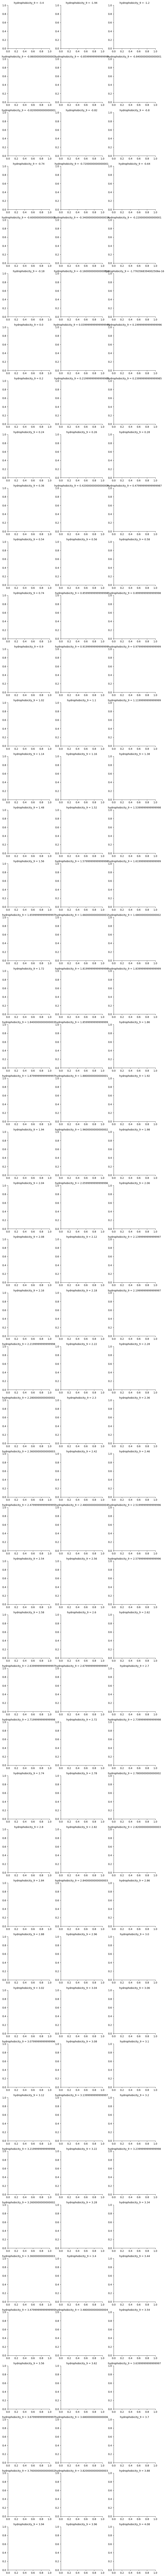

In [106]:
g = sns.FacetGrid(hydro, col='hydrophobicity_9', col_wrap=3, hue='dataset', sharex=False, sharey=False)
g.map(sns.kdeplot, 'Value', fill=True, alpha=0.5)
g.add_legend()
plt.suptitle("Distribuzione di idrofobicità (TP vs FN)", y=1.02)
plt.show()

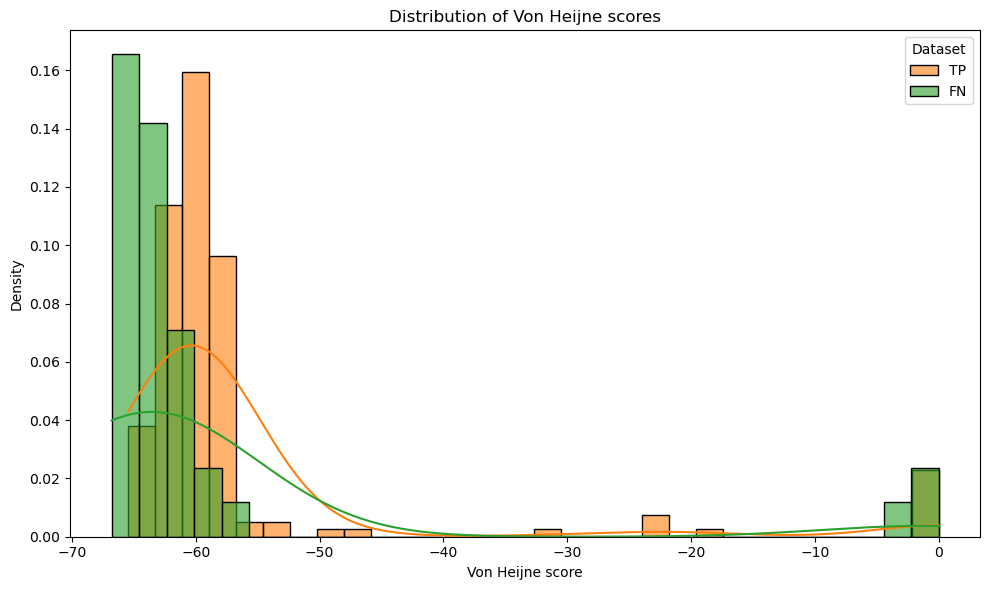

In [88]:
plt.figure(figsize=(10,6))
sns.histplot(
    data=tp_score[tp_score['dataset'] == 'TP'],
    x='score_1',
    color='tab:orange',
    bins=30,
    kde=True,
    stat='density',
    common_norm=False,
    alpha=0.6,
    label='TP'
)

sns.histplot(
    data=fn_score[fn_score['dataset'] == 'FN'],
    x='score_1',
    color='tab:green',
    bins=30,
    kde=True,
    stat='density',
    common_norm=False,
    alpha=0.6,
    label='FN'
)

plt.xlabel("Von Heijne score")
plt.ylabel("Density")
plt.title("Distribution of Von Heijne scores")
plt.legend(title='Dataset')
plt.tight_layout()
plt.savefig('../6_FP_FN_evaluation/figures/Distribution_vh_score_svm.png', dpi=100, format='png')
plt.show()

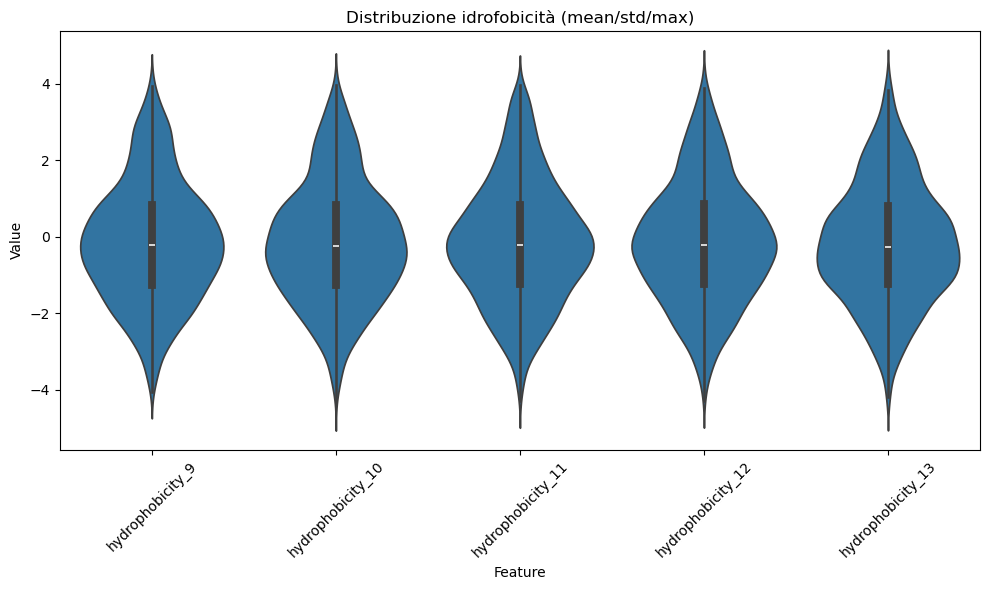

In [92]:
tp_score = pos_benchmark_svm.merge(test_features[['id', 'score_1']], how = 'inner')
fn_score = fn_svm.merge(test_features[['id', 'score_1']], how = 'inner')

hydro_cols = [
    'hydrophobicity_9',
    'hydrophobicity_10',
    'hydrophobicity_11',
    'hydrophobicity_12',
    'hydrophobicity_13'
]
tf_melt = test_features.melt(value_vars=hydro_cols,
                  var_name='Feature',
                  value_name='Value')

plt.figure(figsize=(10,6))
sns.violinplot(data=tf_melt, x='Feature', y='Value', inner='box')
plt.title("Distribuzione idrofobicità (mean/std/max)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

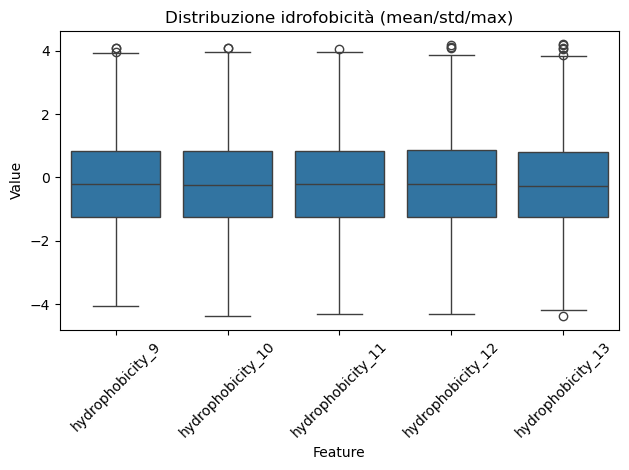

In [93]:
sns.boxplot(data=tf_melt, x='Feature', y='Value')
plt.title("Distribuzione idrofobicità (mean/std/max)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

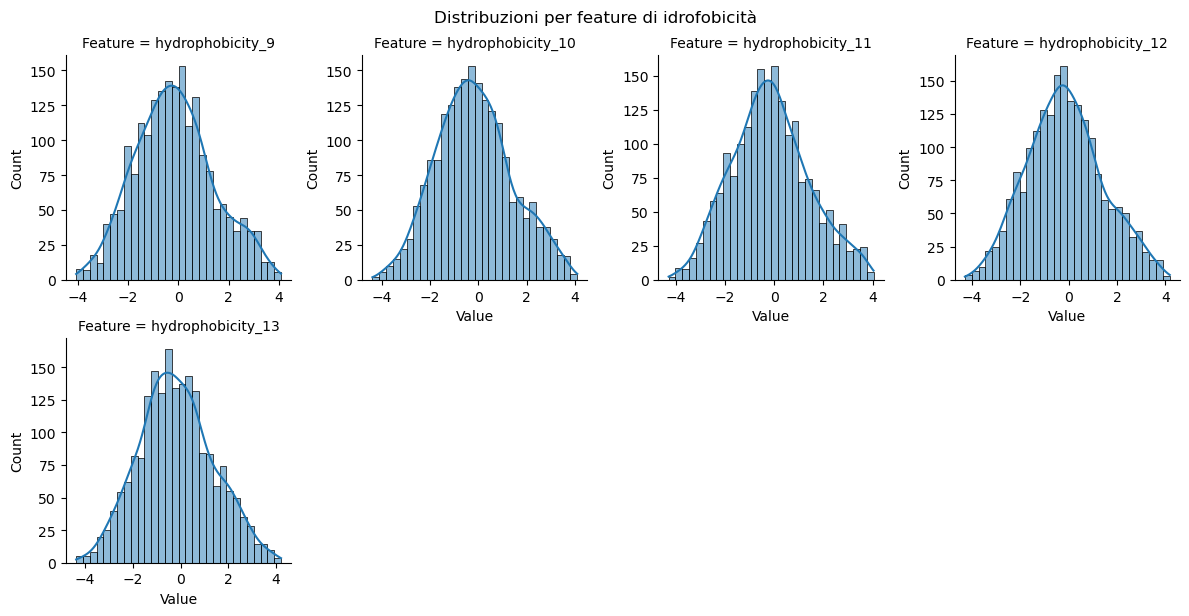

In [94]:
g = sns.FacetGrid(tf_melt, col='Feature', col_wrap=4, sharex=False, sharey=False)
g.map(sns.histplot, 'Value', kde=True, bins=30)
plt.suptitle("Distribuzioni per feature di idrofobicità", y=1.02)
plt.show()